<a href="https://colab.research.google.com/github/seemantobarman/cat_or_dog_CNN_Model/blob/master/cat_or_dog_CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
!mkdir dataset

In [0]:
!cp -R /content/drive/My\ Drive/Colab\ Notebooks/Cat\ or\ Dog/dataset/single_prediction /content/dataset

In [0]:
!cp -R /content/drive/My\ Drive/Colab\ Notebooks/Cat\ or\ Dog/dataset/test_set /content/dataset

In [0]:
!cp -R /content/drive/My\ Drive/Colab\ Notebooks/Cat\ or\ Dog/dataset/training_set /content/dataset

In [6]:
#Importing all the packages and libraries

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

Using TensorFlow backend.


In [0]:
#Initializing the CNN

classifier = Sequential()

In [8]:
#Convolution layer 1

classifier.add(Convolution2D(32,3,3, border_mode="same", input_shape=(64,64,3), activation="relu"))

#Max Pooling for layer 1

classifier.add(MaxPooling2D(pool_size=(2,2)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu", padding="same")`
  


In [9]:
#Convolution layer 2

classifier.add(Convolution2D(32,3,3, border_mode="same", activation="relu"))

#Max Pooling for layer 2

classifier.add(MaxPooling2D(pool_size=(2,2)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  


In [0]:
#Flatten

classifier.add(Flatten())

In [11]:
#Full Connection of the layers

classifier.add(Dense(output_dim=128, activation="relu"))

#Output layer

classifier.add(Dense(output_dim=1, activation="sigmoid"))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  


In [0]:
#Compiling the CNN

classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [0]:
#Fitting the images to the CNN

from keras.preprocessing.image import ImageDataGenerator

In [14]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        '/content/dataset/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        '/content/dataset/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

history = classifier.fit_generator(
        training_set,
        steps_per_epoch=8000,
        epochs=15,
        validation_data=test_set,
        validation_steps=2000)

Found 8048 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/15
8000/8000 [==============================] - 1201s 150ms/step - loss: 0.3674 - accuracy: 0.8274 - val_loss: 0.7995 - val_accuracy: 0.8035
Epoch 2/15
8000/8000 [==============================] - 1190s 149ms/step - loss: 0.1328 - accuracy: 0.9483 - val_loss: 0.5255 - val_accuracy: 0.8049
Epoch 3/15
8000/8000 [==============================] - 1221s 153ms/step - loss: 0.0691 - accuracy: 0.9748 - val_loss: 0.6325 - val_accuracy: 0.8006
Epoch 4/15
8000/8000 [==============================] - 1226s 153ms/step - loss: 0.0486 - accuracy: 0.9828 - val_loss: 0.2313 - val_accuracy: 0.8065
Epoch 5/15
8000/8000 [==============================] - 1208s 151ms/step - loss: 0.0370 - accuracy: 0.9870 - val_loss: 1.1956 - val_accuracy: 0.7915
Epoch 6/15
8000/8000 [==============================] - 1211s 151ms/step - loss: 0.0315 - accuracy: 0.9890 - val_loss: 2.2119 - val_accuracy: 0.7940
Epoch 7/15
8000/8000 [

In [0]:
classifier.save('/content/drive/My Drive/Colab Notebooks/Cat or Dog/trained_model_v2.h5')

In [16]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [17]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


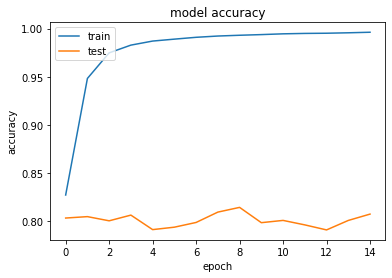

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

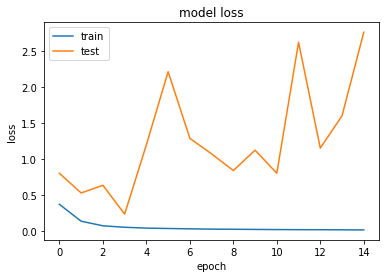

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()